In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

# Example 1

## Generate data

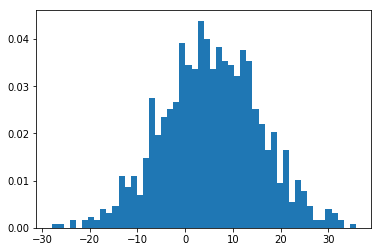

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [3]:
a = RTBM(1,1)

In [4]:
minim = minimizer.CMA(False)

CMA on 1 cpu(s) enabled


In [5]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-4)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=885634, Sun Nov  5 05:11:19 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 9.237830495646103e+03 1.0e+00 1.78e-01  2e-01  2e-01 0:00.0
    2     16 9.036529913320126e+03 1.2e+00 1.69e-01  1e-01  2e-01 0:00.1
    3     24 7.784292334960624e+03 1.3e+00 1.61e-01  1e-01  2e-01 0:00.1
   63    504 3.834036143935929e+03 3.8e+01 3.83e-02  7e-03  5e-02 0:03.2
  100    800 3.739004087513887e+03 1.3e+02 3.88e-02  4e-03  4e-02 0:05.0
  160   1280 3.736857140666479e+03 4.6e+03 4.44e-04  1e-05  1e-03 0:08.1
CMAEvolutionStrategyResult(xbest=array([-2.86092075e-06, -1.33417020e-01, -4.86859211e-01,  2.03850516e-01,
        1.22085369e+00]), fbest=3736.8571406664787, evals_best=1273, evaluations=1280, iterations=160, xfavorite=array([ 1.26911848e-06, -1.33436930e-01, -4.86893809e-01,  2.03851404e-01,
        1.22102179e+00]), stds=array([1.13519940e-05, 6.43882754e-05, 2.37268408e-04, 3.78737151e-05,
  

## Testing output

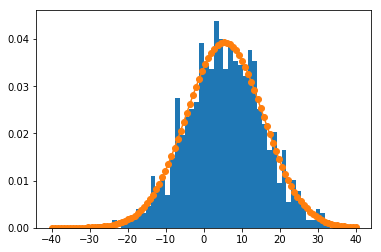

In [6]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

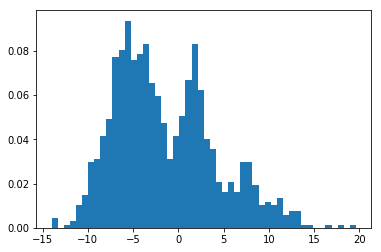

In [7]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [8]:
a = RTBM(1,2)

In [9]:
minim = minimizer.CMA(False)

CMA on 1 cpu(s) enabled


In [10]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=961018, Sun Nov  5 05:11:27 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 9.962957741612208e+03 1.0e+00 1.90e-01  2e-01  2e-01 0:00.0
    2     20 8.141609171783587e+03 1.2e+00 2.06e-01  2e-01  2e-01 0:00.2
    3     30 7.146774492282979e+03 1.3e+00 2.15e-01  2e-01  2e-01 0:00.3
   22    220 3.192816321356893e+03 3.0e+00 1.14e-01  9e-02  1e-01 0:03.5
   45    450 3.144910822371296e+03 5.5e+00 4.63e-02  3e-02  5e-02 0:07.6
   77    770 3.139132327256885e+03 1.6e+01 3.22e-02  2e-02  4e-02 0:12.7
  100   1000 3.138330050188558e+03 3.2e+01 1.16e-02  6e-03  1e-02 0:16.2
  145   1450 3.138178011905728e+03 1.5e+02 2.60e-03  6e-04  4e-03 0:23.3
  196   1960 3.138177754811825e+03 8.1e+02 7.21e-04  4e-05  1e-03 0:31.4
  200   2000 3.138177748969058e+03 8.1e+02 8.65e-04  5e-05  2e-03 0:32.0
  264   2640 3.138177686564726e+03 2.3e+03 1.46e-03  4e-05  3e-03 0:42.1
  300   3000 3.138177541359280e+03

## Testing output

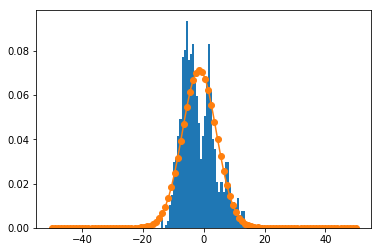

In [11]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')